<a href="https://colab.research.google.com/github/alexandreherculano/pycaret_range_mobile_prices/blob/main/pycaret_range_mobile_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalar pycaret
!pip install pycaret

In [29]:
# Carregar bibliotecas
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pycaret
from pycaret.classification import *
from pycaret.utils import enable_colab

In [30]:
train = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1800 non-null   int64  
 1   battery_power  1800 non-null   int64  
 2   blue           1800 non-null   int64  
 3   clock_speed    1800 non-null   float64
 4   dual_sim       1800 non-null   int64  
 5   fc             1800 non-null   int64  
 6   four_g         1800 non-null   int64  
 7   int_memory     1800 non-null   int64  
 8   m_dep          1800 non-null   float64
 9   mobile_wt      1800 non-null   int64  
 10  n_cores        1800 non-null   int64  
 11  pc             1800 non-null   int64  
 12  px_height      1800 non-null   int64  
 13  px_width       1800 non-null   int64  
 14  ram            1800 non-null   int64  
 15  sc_h           1800 non-null   int64  
 16  sc_w           1800 non-null   int64  
 17  talk_time      1800 non-null   int64  
 18  three_g 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             200 non-null    int64  
 1   battery_power  200 non-null    int64  
 2   blue           200 non-null    int64  
 3   clock_speed    200 non-null    float64
 4   dual_sim       200 non-null    int64  
 5   fc             200 non-null    int64  
 6   four_g         200 non-null    int64  
 7   int_memory     200 non-null    int64  
 8   m_dep          200 non-null    float64
 9   mobile_wt      200 non-null    int64  
 10  n_cores        200 non-null    int64  
 11  pc             200 non-null    int64  
 12  px_height      200 non-null    int64  
 13  px_width       200 non-null    int64  
 14  ram            200 non-null    int64  
 15  sc_h           200 non-null    int64  
 16  sc_w           200 non-null    int64  
 17  talk_time      200 non-null    int64  
 18  three_g   

In [4]:
train.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,7,14,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,4,8,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,1,3,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,7,10,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,2,0,294,1233,1069,18,6,14,1,0,0,0


In [32]:
reg = setup(data = train, target = 'price_range', train_size = 0.7)

,Description,Value
0,session_id,3388
1,Target,price_range
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
4,Original Data,"(1800, 22)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
#Treinar modelos
compare_models(sort = 'Accuracy', round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.915,0.987,0.913,0.916,0.914,0.887,0.887,0.130
lightgbm,Light Gradient Boosting Machine,0.904,0.987,0.902,0.906,0.904,0.872,0.873,0.371
gbc,Gradient Boosting Classifier,0.898,0.983,0.896,0.899,0.897,0.863,0.864,1.497
lda,Linear Discriminant Analysis,0.895,0.988,0.894,0.898,0.896,0.860,0.861,0.051
rf,Random Forest Classifier,0.826,0.957,0.821,0.824,0.821,0.768,0.770,0.632
dt,Decision Tree Classifier,0.817,0.879,0.815,0.821,0.817,0.756,0.757,0.036
et,Extra Trees Classifier,0.766,0.931,0.761,0.762,0.760,0.687,0.689,0.604
lr,Logistic Regression,0.650,0.887,0.644,0.651,0.646,0.533,0.535,0.957
ada,Ada Boost Classifier,0.634,0.900,0.641,0.741,0.612,0.514,0.545,0.192
ridge,Ridge Classifier,0.626,0.000,0.616,0.620,0.579,0.498,0.522,0.025


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
#Definir modelo
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9206,0.9881,0.9203,0.9216,0.9209,0.8942,0.8943
1,0.9286,0.9859,0.9276,0.9302,0.9288,0.9047,0.9051
2,0.9206,0.9933,0.9175,0.9239,0.9199,0.8940,0.8955
3,0.8968,0.9797,0.8936,0.8994,0.8950,0.8622,0.8642
4,0.8730,0.9808,0.8685,0.8701,0.8707,0.8304,0.8310
5,0.9444,0.9946,0.9431,0.9460,0.9444,0.9259,0.9264
6,0.9048,0.9900,0.9037,0.9051,0.9047,0.8729,0.8730
7,0.9365,0.9868,0.9353,0.9364,0.9362,0.9153,0.9154
8,0.8810,0.9770,0.8786,0.8871,0.8800,0.8411,0.8439
9,0.9440,0.9910,0.9430,0.9451,0.9436,0.9253,0.9258


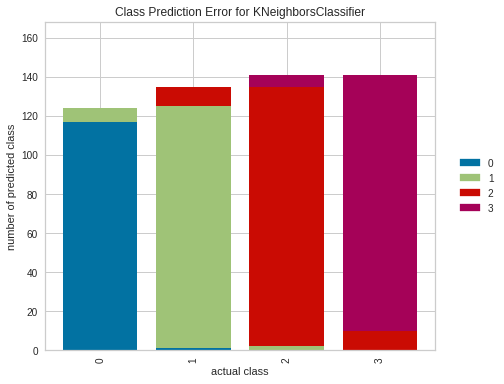

In [38]:
#Plot - Erros: Predições X Resultados
plot_model(knn, plot='error')

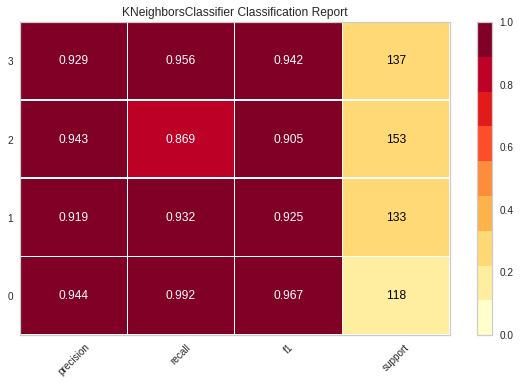

In [41]:
plot_model(knn, plot='class_report')

In [47]:
#Predição
knn_predict = predict_model(knn, data = test)
knn_predict.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Label,Score
0,0,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,1.0
1,1,595,0,0.9,1,7,1,23,0.1,121,3,17,441,810,3752,10,2,18,1,1,0,3,0.6
2,2,1131,1,0.5,1,11,0,49,0.6,101,5,18,658,878,1835,19,13,16,1,1,0,1,1.0
3,3,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1,1,1.0
4,4,956,0,0.5,0,1,1,41,1.0,143,7,6,511,1075,3286,17,8,12,1,1,0,3,0.6


In [24]:
#Modelo final
final_knn = finalize_model(knn)